In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def circR(samples,axis=None):
    res = np.mean(np.exp(1j * samples), axis=axis)
    return res
def wrap(ang):
    return np.mod(ang+np.pi,2*np.pi) - np.pi

In [21]:
import pickle
with open('firing_1226.data','rb') as f:
    results=pickle.load(f)
memorys = np.load('xMemoryList.npy')
synapses = np.load('WList.npy')

In [22]:
nIter = 10
M = 15
N= 200
modes = ['Full','Feedforward','None']
xTarget = np.empty((nIter*M,N))
x = {}
for mode in modes: x[mode] = np.empty((nIter*M,N))

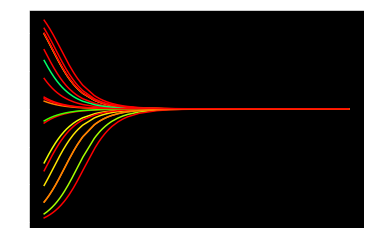

In [23]:
from matplotlib import cm
ii = np.random.randint(0,nIter)
k = np.random.randint(0,M)
ind = M*ii+k
x_target = memorys[ii][:,k]
x_t = results[ind][modes[2]]['y']
t = results[ind][modes[2]]['t']
for i in np.random.randint(0,N,20):
    p = x_target[i]
    plt.plot(t,x_t[i,:],c=cm.hsv(p/(2*np.pi)))

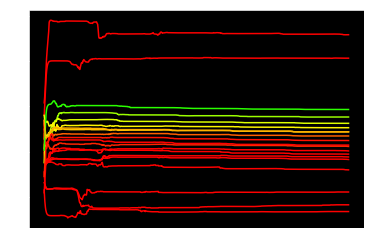

In [24]:
from matplotlib import cm
ii = np.random.randint(0,nIter)
k = np.random.randint(0,M)
ind = M*ii+k
x_target = memorys[ii][:,k]
x_t = results[ind][modes[0]]['y']
t = results[ind][modes[0]]['t']
for i in np.random.randint(0,N,20):
    p = x_target[i]
    plt.plot(t,x_t[i,:],c=cm.hsv(p/(2*np.pi)))

In [30]:
for ii in range(nIter):
    for k in range(M):
        ind = M*ii+k
        xTarget[ind] = memorys[ii][:,k]
        for mode in modes:
            sol = results[ind][mode]
            x[mode][ind] = sol['y'][:,-1]

In [31]:
dx = {}
R = {}
bias= {}
var = {}
error = {}
for mode in modes:
    xx = np.mod(x[mode],np.pi*2)
    dx[mode] = xx - np.mod(xTarget,np.pi*2)
    dx[mode] = dx[mode].flatten()
    dx[mode] = wrap(dx[mode])

In [32]:
for mode in modes:
    R[mode] = circR(dx[mode])
    bias[mode] = np.angle(R[mode])
    var[mode] = 1 - abs(R[mode])
    error[mode] = var[mode] + 2*abs(R[mode])*(np.sin(bias[mode]/2)**2)
print(bias)
print(var)
print(error)

{'Full': 0.1054736543233081, 'Feedforward': 0.0034933737240200693, 'None': -0.019457136218307535}
{'Full': 0.08470158267569994, 'Feedforward': 0.05084668125533487, 'None': 0.7526803026226121}
{'Full': 0.08978807096266257, 'Feedforward': 0.05085247282162838, 'None': 0.7527271163097328}


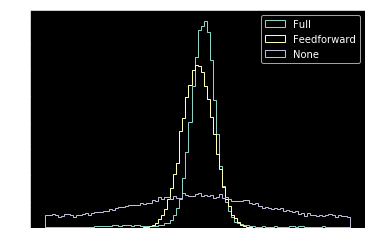

In [33]:
for mode in modes:
    h = plt.hist(dx[mode],100,(-np.pi,np.pi),density=True,histtype='step',label=mode)
    plt.legend()
        


